In [1]:
import sys
import numpy as np


In [2]:
from numpy import linalg

In [4]:
# define an array
A = np.arange(9) -3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [5]:
A = A.reshape((3,3))
A

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [6]:
# Euclidean (L2) norm -default
print(np.linalg.norm(A))

8.306623862918075


In [7]:
# the frogenius norm is the L2 norm for a matrix
print(np.linalg.norm(A, 'fro'))

8.306623862918075


In [9]:
# the max norm where P = infinity
B = np.arange(9) -3
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf))

12.0
5.0


In [10]:
# vector normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm
print(A_unit)

[[-0.36115756 -0.24077171 -0.12038585]
 [ 0.          0.12038585  0.24077171]
 [ 0.36115756  0.48154341  0.60192927]]


In [11]:
norm = np.linalg.norm(B)
B_unit = B / norm
print(B_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [13]:
# magnitude of unit vector is 1
np.linalg.norm(B_unit)

0.9999999999999999

In [14]:
# Eigendecomposition
# find the eigenvalue and eigenvector for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [16]:
# returns the eigenvalues for the matrix
eigenvalues


array([1., 2., 3.])

In [17]:
# returns eigenvectors
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
# the eigenvalue w[i] corresponds to the eigenvector v[z,i]
print ('Eigenvalue: {}'.format(eigenvalues[1]))
print ('Eigenvector: {}'.format(eigenvectors[:,1]))

Eigenvalue: 2.0
Eigenvector: [0. 1. 0.]


In [22]:
# verify eigendecomposition 
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int32)
print (output)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [23]:
# matlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

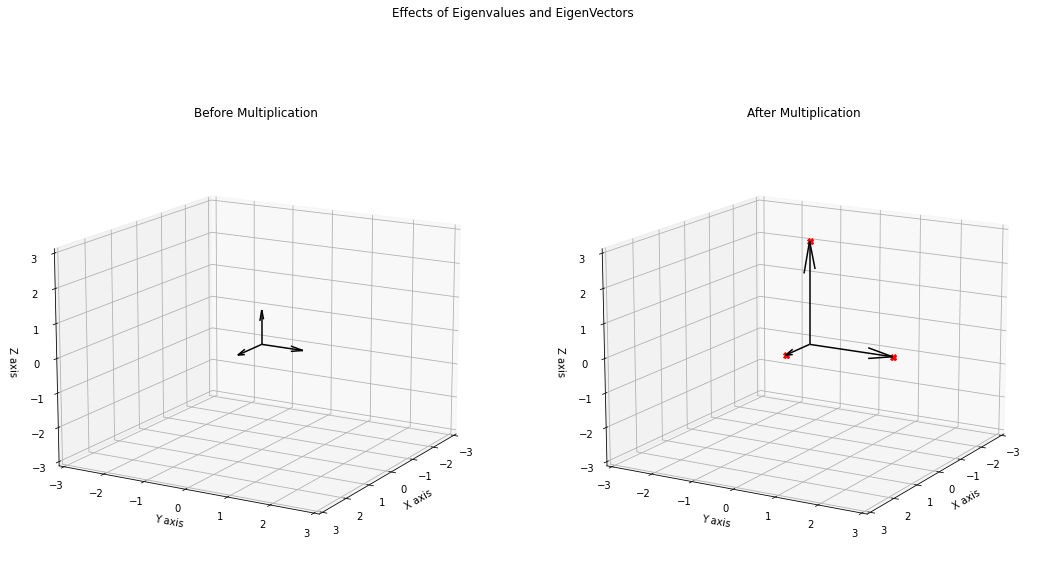

In [27]:
# plot the eigenvector
origin = [0,0,0]
fig = plt.figure(figsize=(18,10)) # figure formating
fig.suptitle('Effects of Eigenvalues and EigenVectors')
ax1 = fig.add_subplot(121, projection = '3d') 

ax1.quiver(origin, origin, origin,eigenvectors[0,:],eigenvectors[1,:],eigenvectors[2,:],color = 'k')
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15,30)
ax1.set_title('Before Multiplication')

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection = '3d')
ax2.quiver(origin, origin, origin,new_eig[0,:],new_eig[1,:],new_eig[2,:],color = 'k')
# add the eigenvalues to the plot
ax2.plot((eigenvalues[0]*eigenvectors[0]),(eigenvalues[1]*eigenvectors[1]),(eigenvalues[2]*eigenvectors[2]),'rX')
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15,30)
ax2.set_title('After Multiplication')

# show the plot
plt.show()